# Model Training

### 1.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [3]:
!pip install xgboost

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('stud.csv')

### Show Top 5 records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [7]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [8]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Create an Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true,predicted):
  mea = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  rmse = np.sqrt(mean_squared_error(true,predicted))
  r2 = r2_score(true,predicted)
  return mea,mse,rmse,r2

In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "GradientBoosting Regressor":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
  print("- Mean Squared Error : {:.4f}".format(model_train_mse))
  print("- R2 Score : {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
  print("- Mean Squared Error : {:.4f}".format(model_test_mse))
  print("- R2 Score : {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3271
- Mean Absolute Error : 4.2694
- Mean Squared Error : 28.3779
- R2 Score : 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4186
- Mean Absolute Error : 4.2195
- Mean Squared Error : 29.3608
- R2 Score : 0.8793


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error : 5.2063
- Mean Squared Error : 43.4784
- R2 Score : 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error : 5.1579
- Mean Squared Error : 42.5064
- R2 Score : 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error : 4.2650
- Mean Squared Error : 28.3378
- R2 Score : 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error : 4.2111
- Mean Squared Err

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879342
8,GradientBoosting Regressor,0.872161
9,AdaBoost Regressor,0.858534
5,Random Forest Regressor,0.852762
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.782192
4,Decision Tree,0.747204


### Linear Regression

In [16]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.93


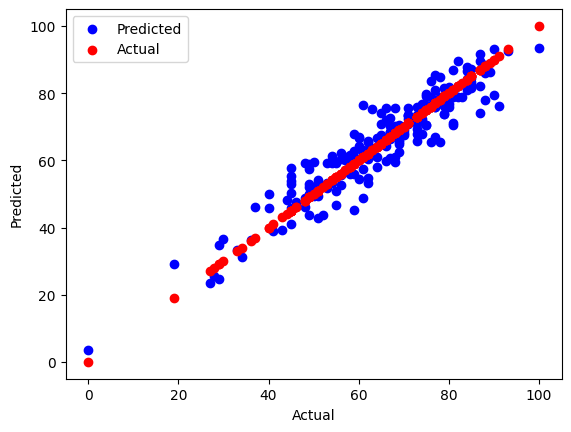

In [20]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend() # To display the labels
plt.show()

<Axes: xlabel='math_score'>

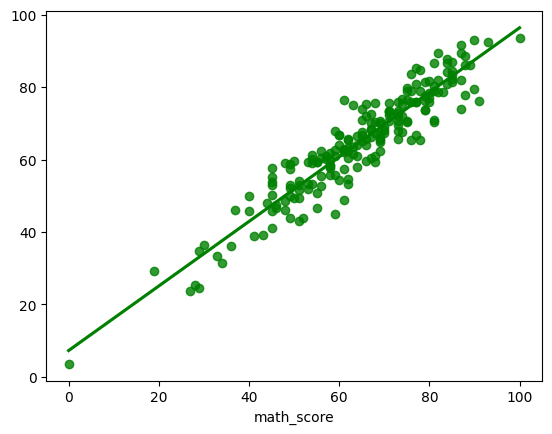

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

### Difference between Actual and Predicted Values

In [31]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
print(pred_df)

     Actual Value  Predicted Value  Difference
521            91         76.21875    14.78125
737            53         59.21875    -6.21875
740            80         76.90625     3.09375
660            74         76.71875    -2.71875
411            84         87.90625    -3.90625
..            ...              ...         ...
408            52         43.81250     8.18750
332            62         62.40625    -0.40625
208            74         67.75000     6.25000
613            65         66.81250    -1.81250
78             61         62.68750    -1.68750

[200 rows x 3 columns]
